In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("SampleSuperstore.csv")

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Data Cleaning

In [5]:
df.shape

(9994, 13)

In [6]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Exploratoy Data Analysis

Univariate Analysis

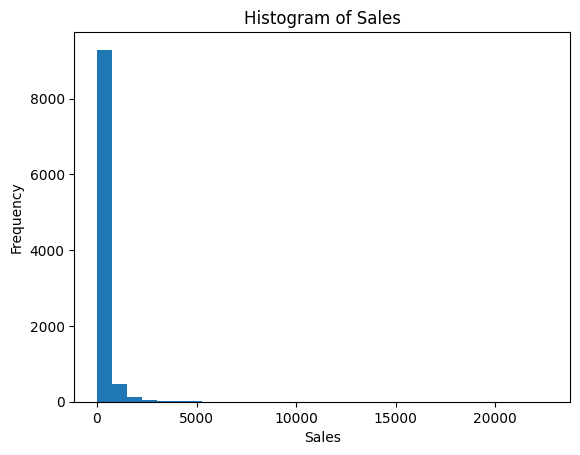

In [10]:
import matplotlib.pyplot as plt

plt.hist(df['Sales'], bins=30)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')
plt.show()



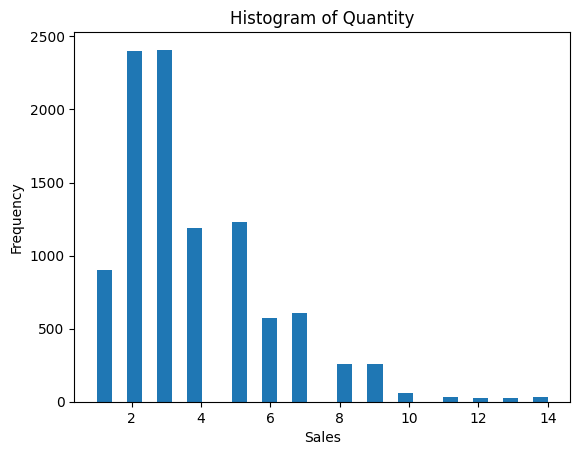

In [11]:
import matplotlib.pyplot as plt

plt.hist(df['Quantity'], bins=30)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity')
plt.show()

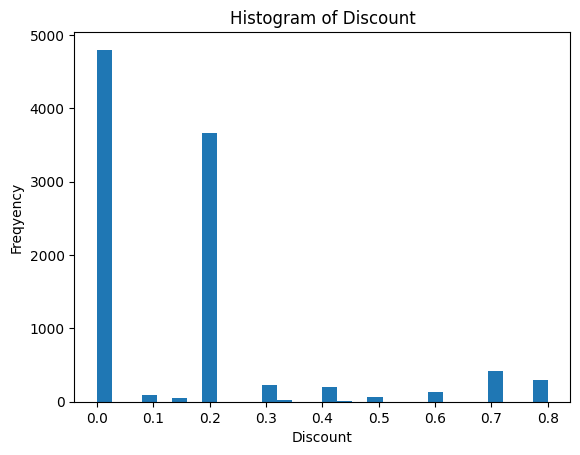

In [12]:
plt.hist(df['Discount'], bins=30)
plt.xlabel("Discount")
plt.ylabel("Freqyency")
plt.title("Histogram of Discount")
plt.show()

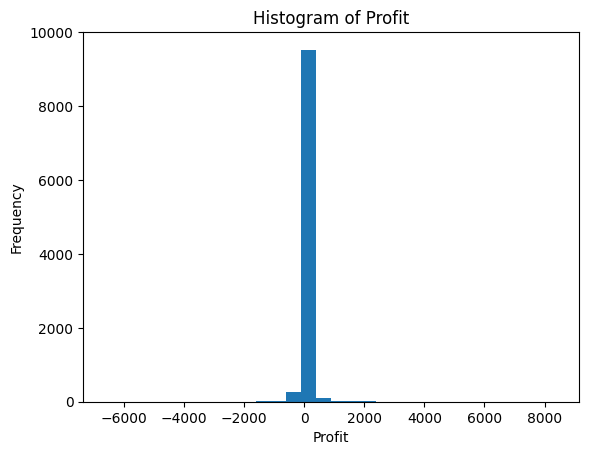

In [13]:
import matplotlib.pyplot as plt

plt.hist(df['Profit'], bins=30)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram of Profit')
plt.show()

BoxPlot To Check Outiers

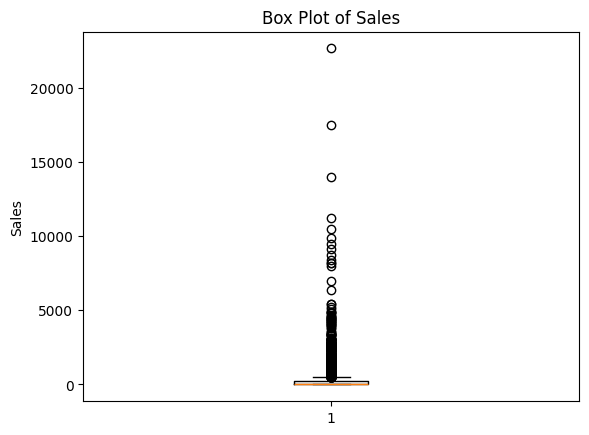

In [14]:
import matplotlib.pyplot as plt

plt.boxplot(df['Sales'])
plt.ylabel('Sales')
plt.title('Box Plot of Sales')
plt.show()


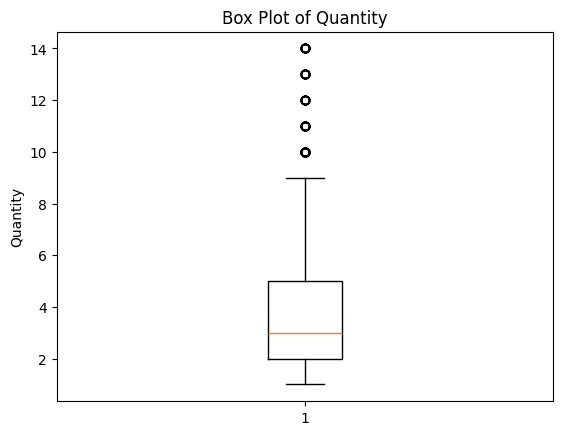

In [15]:
import matplotlib.pyplot as plt

plt.boxplot(df['Quantity'])
plt.ylabel('Quantity')
plt.title('Box Plot of Quantity')
plt.show()

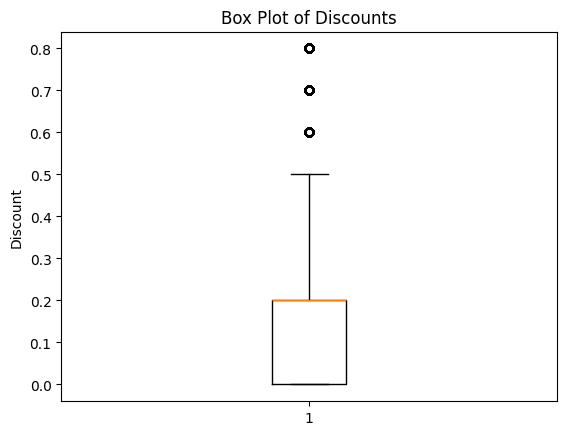

In [16]:
import matplotlib.pyplot as plt

plt.boxplot(df['Discount'])
plt.ylabel('Discount')
plt.title('Box Plot of Discounts')
plt.show()


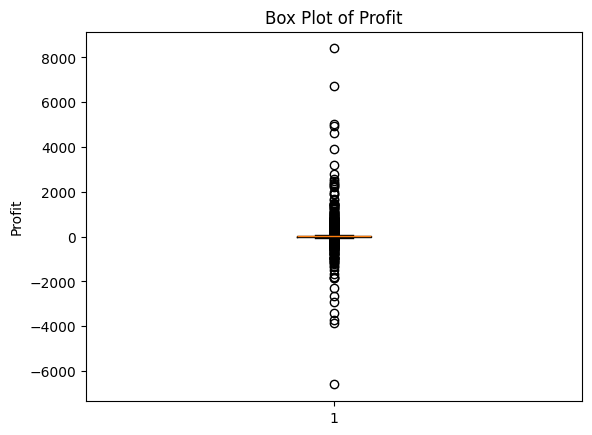

In [17]:
import matplotlib.pyplot as plt

plt.boxplot(df['Profit'])
plt.ylabel('Profit')
plt.title('Box Plot of Profit')
plt.show()

Handling Outliers

In [18]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

In [19]:
outliers.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
10,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.1840,9,0.20,85.3092
11,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,911.4240,4,0.20,68.3568


In [20]:
lower_bound,upper_bound

(np.float64(-271.71000000000004), np.float64(498.93))

Insights:
Although 1,167 observations were flagged as outliers using IQR,they represent valid high-value transactions common in retail (e.g., bulk corporate orders). Removing them would distortbusiness insights. Therefore, outliers were retained, androbust statistics were used

In [21]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

Sub Category wise Histograms

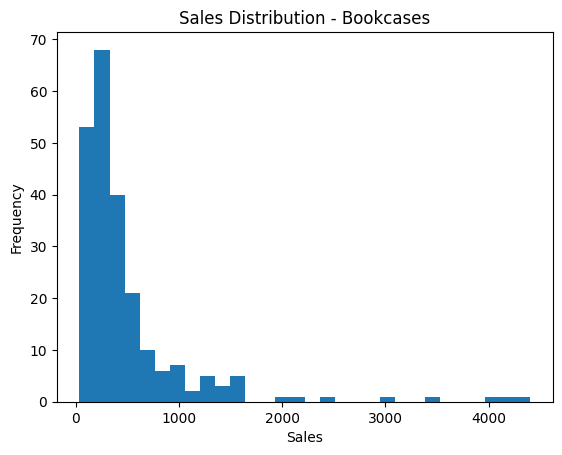

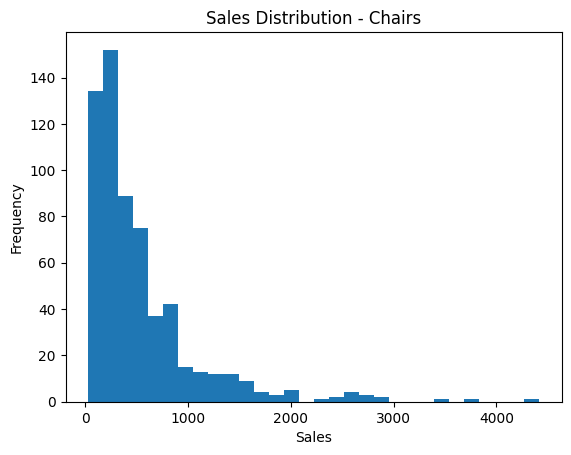

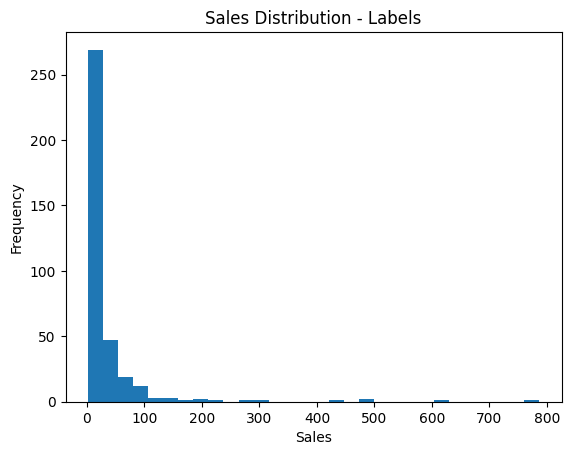

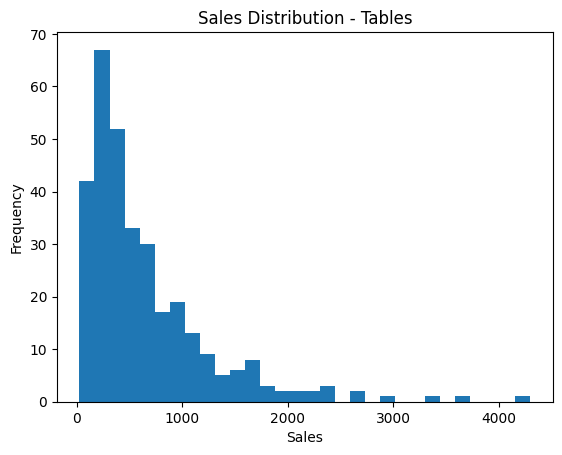

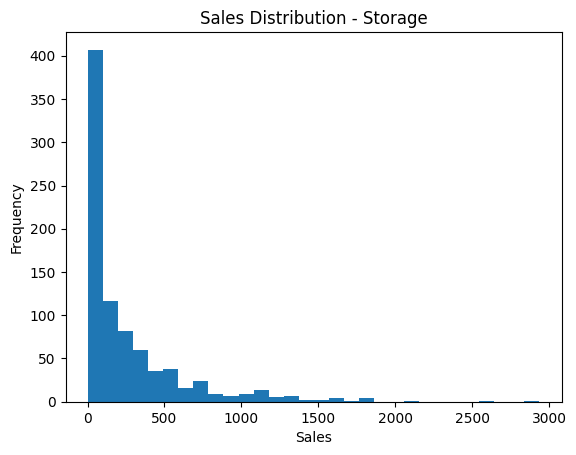

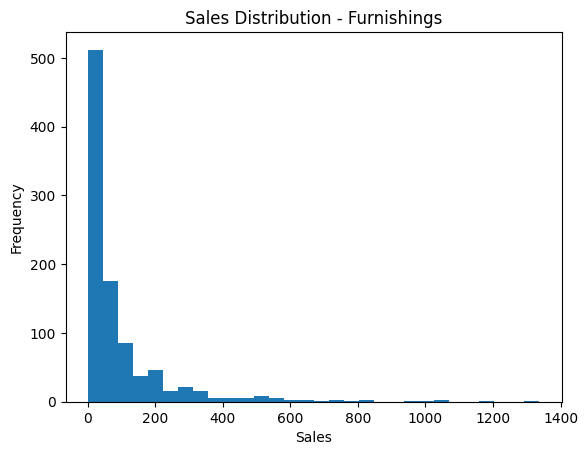

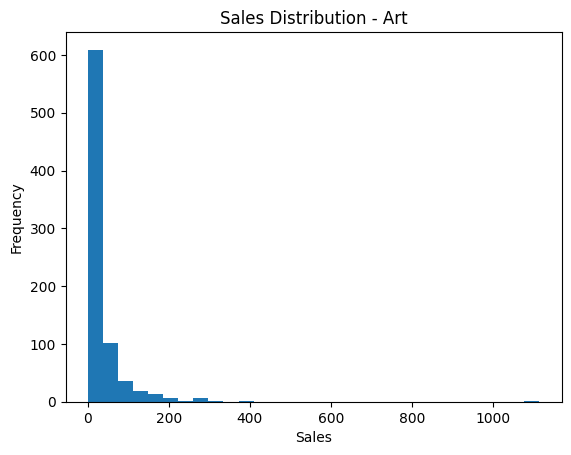

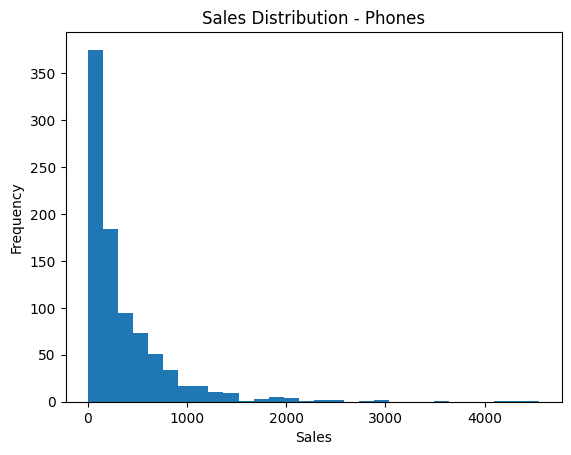

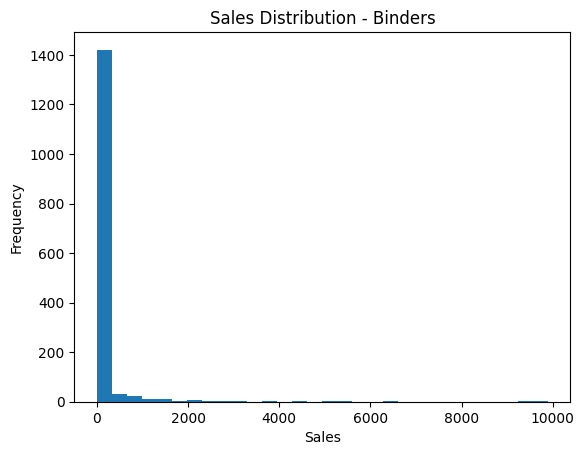

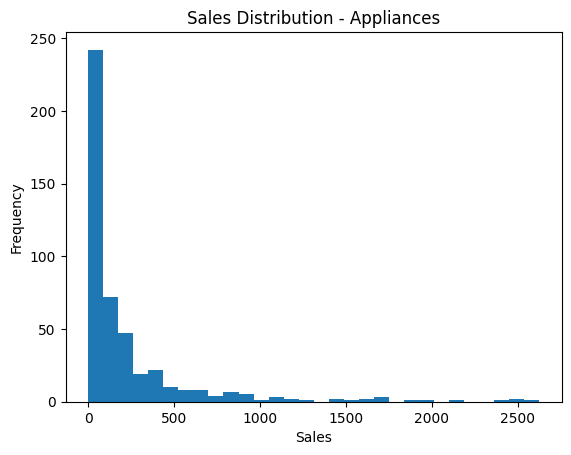

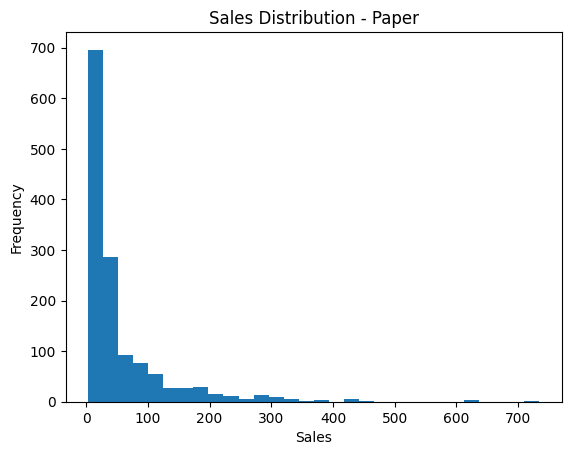

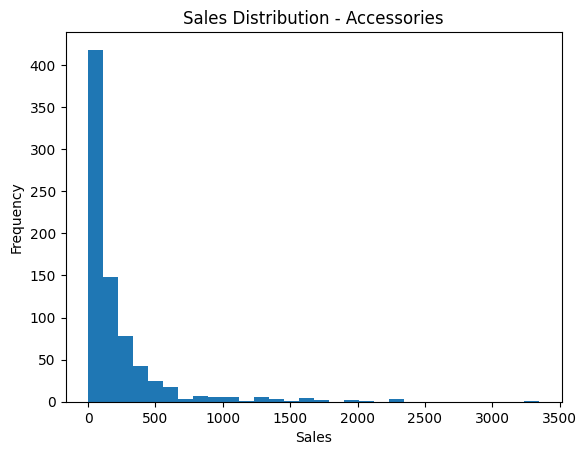

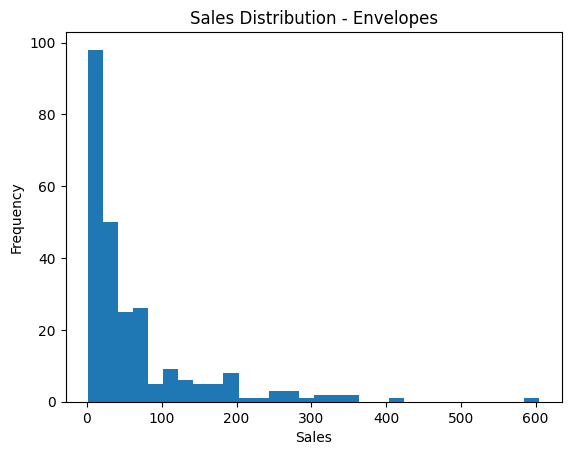

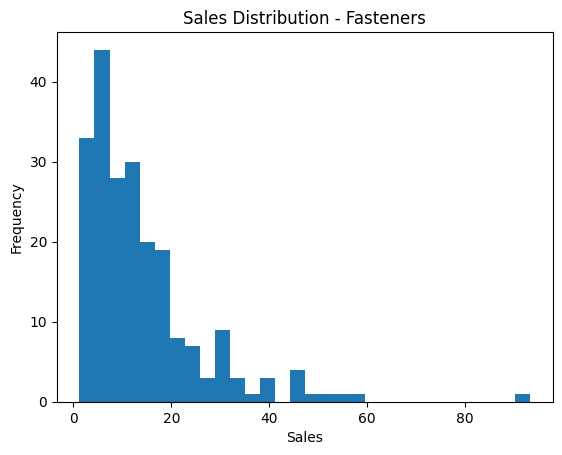

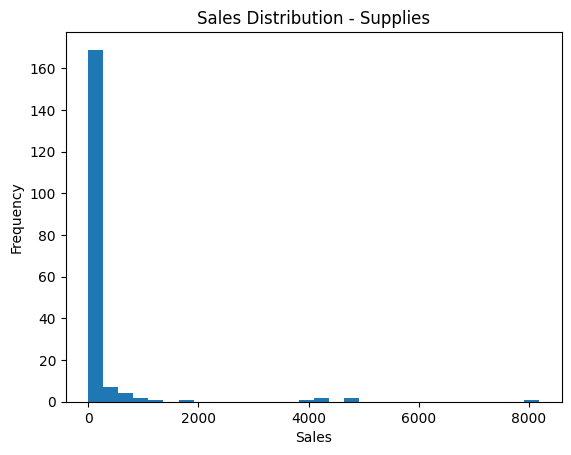

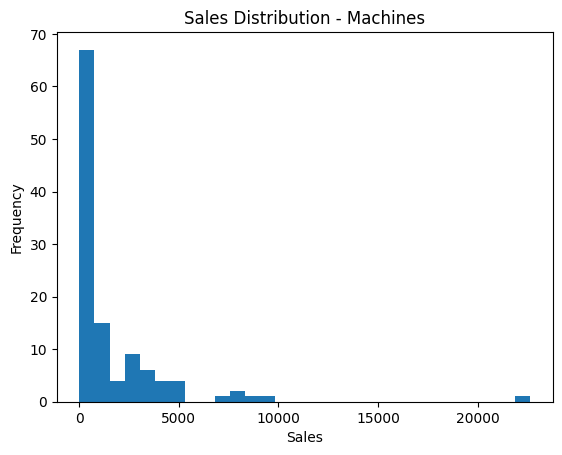

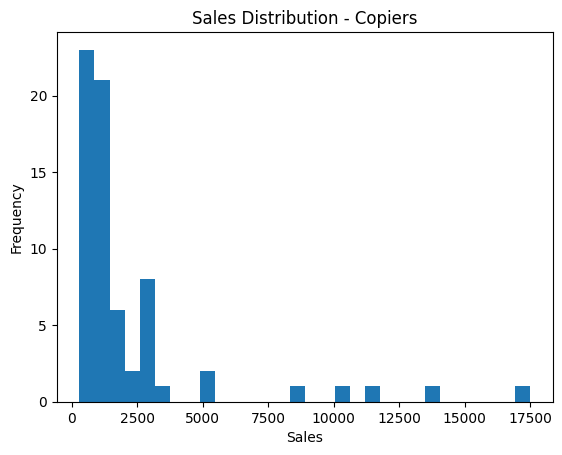

In [22]:
import matplotlib.pyplot as plt

categories = df['Sub-Category'].unique()

for cat in categories:
    subset = df[df['Sub-Category'] == cat]
    
    plt.figure()
    plt.hist(subset['Sales'], bins=30)
    # plt.yscale('log')   # optional: if counts vary a lot
    plt.xlabel('Sales')
    plt.ylabel('Frequency')
    plt.title(f'Sales Distribution - {cat}')
    plt.show()


High-value sales outliers (>10,000) are predominantly observed in the Copiers and Machines sub-categories. These products are typically capital-intensive and purchased by corporate clients, resulting in fewer but significantly larger transactions. Therefore, these extreme values represent genuine business activity rather than data errors.


In [23]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

Univariate analysis of categorical variable

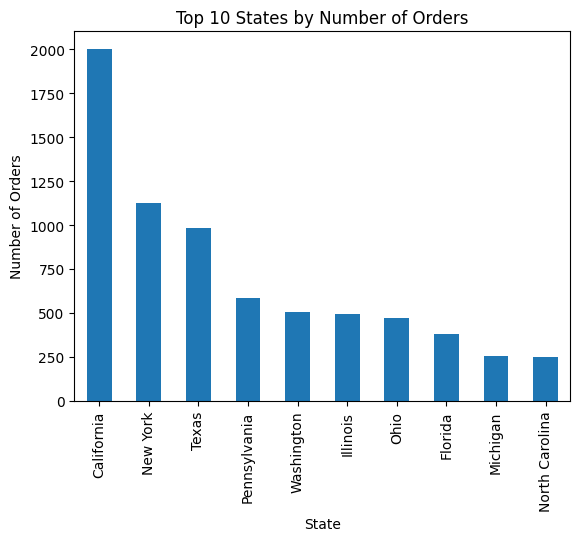

In [24]:
import matplotlib.pyplot as plt

top_states = df['State'].value_counts().head(10)

plt.figure()
top_states.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.title('Top 10 States by Number of Orders')
plt.show()




Insights:
1.California,  New York, Texas are the states with most numbers of orders. 

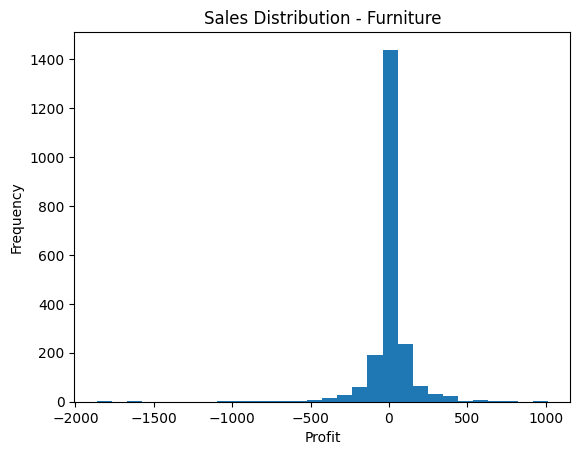

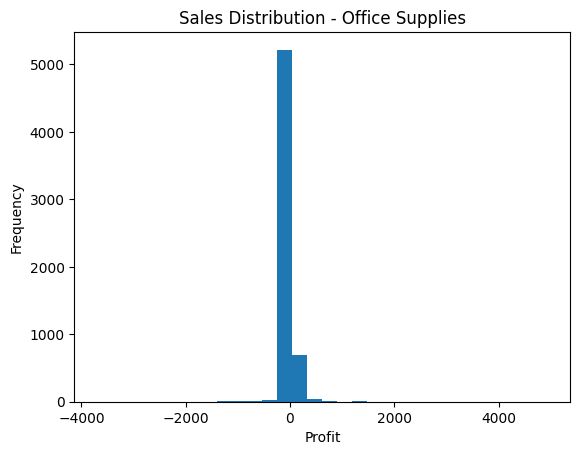

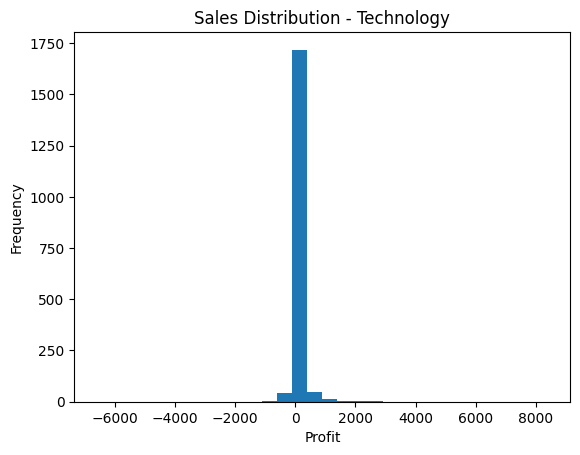

In [25]:
import matplotlib.pyplot as plt

categories = df['Category'].unique()

for cat in categories:
    subset = df[df['Category'] == cat]
    
    plt.figure()
    plt.hist(subset['Profit'], bins=30)
  
    plt.xlabel('Profit')
    plt.ylabel('Frequency')
    plt.title(f'Sales Distribution - {cat}')
    plt.show()


Negative profit values were retained as they represent genuine business losses caused by discounting and operational costs. Removing them would eliminate critical signals required for profitability analysis

Bivariate Analysis

Bivariate Analysis of Discount vs Profit

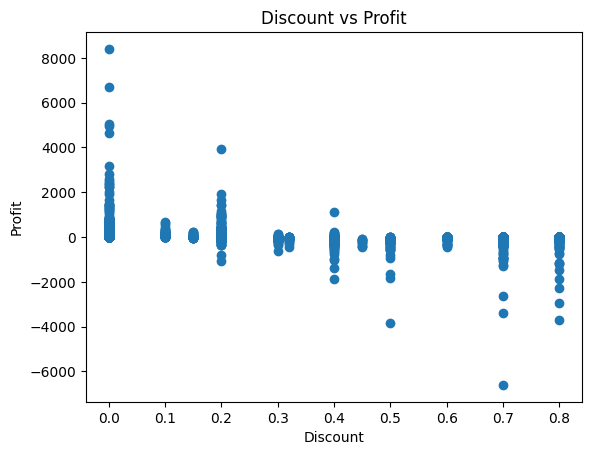

In [26]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['Discount'], df['Profit'])
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Discount vs Profit')
plt.show()


Insights:
While a small number of loss-making transactions are observed around 30% discount, the frequency and magnitude of losses increase significantly once discounts exceed 40%. This suggests a critic discount threshold beyond which profitability deteriorates rapid.


Bivariate Analysis of Sales vs Profit

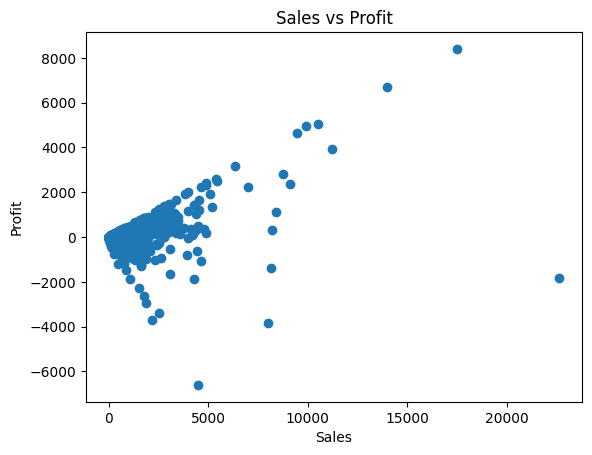

In [28]:
plt.figure()
plt.scatter(df['Sales'], df['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit')
plt.show()


Insights:
Sales–profit analysis shows that while transactions below 8,000 exhibit both positive and negative profit outcomes, all transactions above approximately 8,000 are consistently profitable. This indicates that high-value orders benefit from stronger margin control and are less affected by discount-driven losses.


Category vs Profit (Boxplot)

<Figure size 640x480 with 0 Axes>

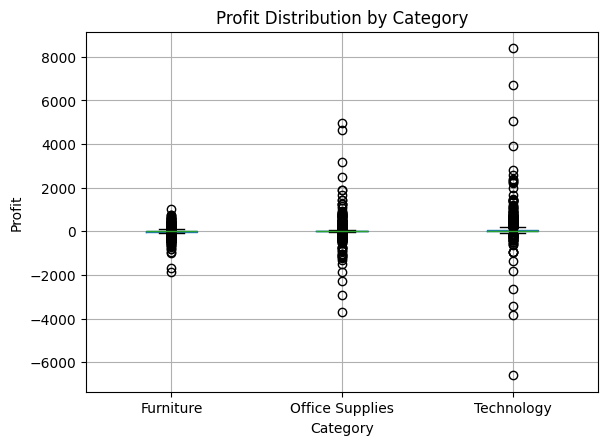

In [29]:
plt.figure()
df.boxplot(column='Profit', by='Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Profit Distribution by Category')
plt.suptitle('')
plt.show()


Sub Category vs Profit (Boxplot)

<Figure size 640x480 with 0 Axes>

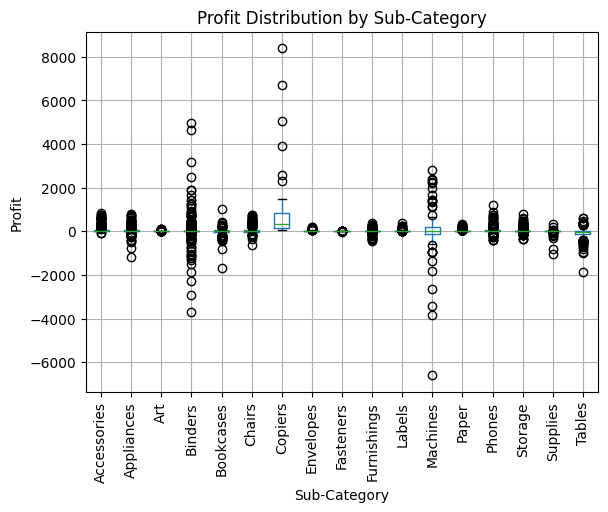

In [30]:
plt.figure()
df.boxplot(column='Profit', by='Sub-Category', rot=90)
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.title('Profit Distribution by Sub-Category')
plt.suptitle('')
plt.show()


Insights:
Sub-category level profit analysis reveals a sharp contrast between Copiers and Machines. While Copiers generate consistently high profits, Machines incur significant losses despite comparable sales volumes This indicates margin erosion in Machines, likely driven by aggressive discounting and high operational costs.
